# Real Estate Time Series

data sourced from [Zillow Research](https://www.zillow.com/research/data/) Under "LIST AND SALE PRICES" filtered by Median Sale Price (Raw, All Homes, Monthly).

![Zillow Data Pic](./img/zillow_data.png)

# Exploratory Data Analysis

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings('ignore')

In [22]:
df_raw = pd.read_csv('./data/zillow_sale.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Columns: 188 entries, RegionID to 2023-04-30
dtypes: float64(183), int64(2), object(3)
memory usage: 924.0+ KB


In [23]:
df_raw.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30
0,102001,0,United States,country,NaN,180000.0,185000.0,185000.0,187000.0,193000.0,...,353000.0,346000.0,340000.0,335000.0,327000.0,322000.0,319000.0,329999.0,340000.0,349900.0
1,394913,1,"New York, NY",msa,NY,404586.0,399000.0,400000.0,400000.0,405000.0,...,579900.0,575000.0,550000.0,531500.0,525000.0,515000.0,520000.0,515000.0,515000.0,535000.0
2,753899,2,"Los Angeles, CA",msa,CA,503000.0,495750.0,500000.0,490000.0,482500.0,...,875000.0,867750.0,850000.0,845000.0,830000.0,810000.0,815000.0,825000.0,842750.0,850000.0
3,394463,3,"Chicago, IL",msa,IL,239000.0,237500.0,241000.0,240000.0,250000.0,...,310000.0,300000.0,285000.0,280000.0,279000.0,275000.0,270000.0,270000.0,289000.0,305000.0
4,394514,4,"Dallas, TX",msa,TX,137000.0,144000.0,143900.0,145874.0,154750.0,...,410000.0,400000.0,387900.0,385000.0,374705.0,364000.0,350000.0,373000.0,375000.0,385000.0


# Step 2: Data Preprocessing

In [24]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'StateName', 'RegionType'], var_name='Date', value_name='Median-Price')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True).dt.to_period('M')
    melted = melted.dropna(subset=['Median-Price'])
    return melted

In [25]:
df = melt_data(df_raw)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89656 entries, 0 to 115106
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   RegionName    89656 non-null  object   
 1   RegionID      89656 non-null  int64    
 2   SizeRank      89656 non-null  int64    
 3   StateName     89473 non-null  object   
 4   RegionType    89656 non-null  object   
 5   Date          89656 non-null  period[M]
 6   Median-Price  89656 non-null  float64  
dtypes: float64(1), int64(2), object(3), period[M](1)
memory usage: 5.5+ MB


In [26]:
df.head()

,RegionName,RegionID,SizeRank,StateName,RegionType,Date,Median-Price
0,United States,102001,0,NaN,country,2008-02,180000.0
1,"New York, NY",394913,1,NY,msa,2008-02,404586.0
2,"Los Angeles, CA",753899,2,CA,msa,2008-02,503000.0
3,"Chicago, IL",394463,3,IL,msa,2008-02,239000.0
4,"Dallas, TX",394514,4,TX,msa,2008-02,137000.0


In [30]:
df['SizeRank'].value_counts()

SizeRank
361    366
0      183
282    183
291    183
290    183
      ... 
711      1
753      1
814      1
862      1
912      1
Name: count, Length: 628, dtype: int64

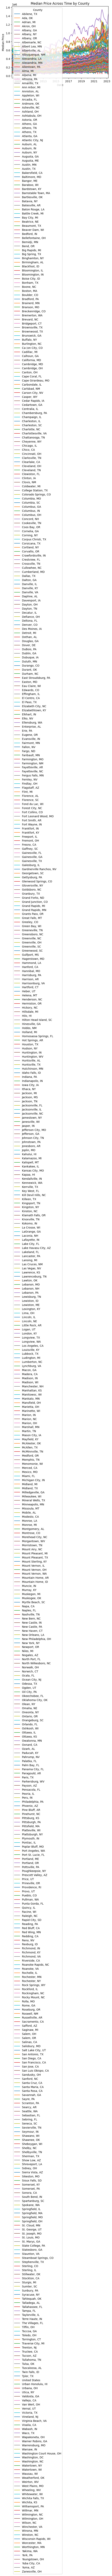

In [29]:

grouped_median_prices = df.groupby(['RegionName', 'Date'])['Median-Price'].median().unstack(level=0)

grouped_median_prices.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Median Price')
plt.title('Median Price Across Time by County')
plt.legend(title='County')
plt.show()